In [2]:
%pip install imageio

  Obtaining dependency information for imageio from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/315.8 kB ? eta -:--:--
   ---------------------------------------- 315.8/315.8 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# PCA es muy util para reducir nuestro espacio de muchas dimensiones a menos dimensiones pero mas significativas

# Vamos a trabajar con un ejemplo de imagenes del Olivetti Research Laboratory in Cambridge, UK, tomadas entre 1992
# y 1994



[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]
204
10
0.8
0.0392156862745098


C:\Users\yporq\AppData\Local\Temp\ipykernel_32740\722789259.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(".\\imagenes\\s3\\3.pgm")


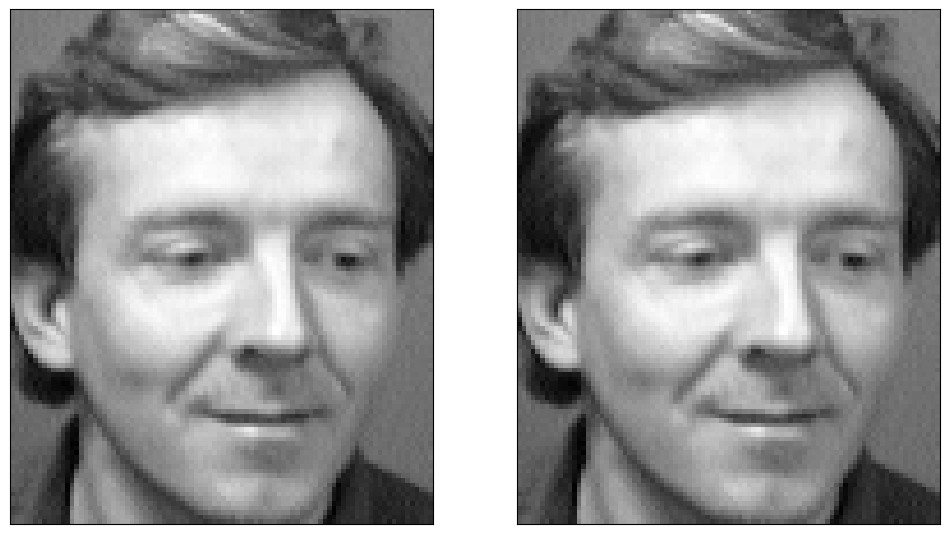

In [4]:
im = imageio.imread(".\\imagenes\\s3\\3.pgm")
im = im.astype(np.uint8)

print(im)
print(np.amax(im))
print(np.amin(im))

im_original = im

#Normalizamos los datos para que esten en el [0,1]
im = im / 255

print(np.amax(im))
print(np.amin(im))

fig, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks':[], 'yticks':[]})

ax[0].imshow(im_original, cmap="gray")
ax[1].imshow(im, cmap="gray")

In [10]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('.\\imagenes\\*\*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(),name=path)
    caras = pd.concat([caras, cara])

fig, axes = plt.subplots(5, 10, figsize=(12,8),
                         subplot_kw = {'xticks':[], 'yticks':[]}, 
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92),cmap="gray")

C:\Users\yporq\AppData\Local\Temp\ipykernel_32740\2565311130.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
C:\Users\yporq\AppData\Local\Temp\ipykernel_32740\2565311130.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
C:\Users\yporq\AppData\Local\Temp\ipykernel_32740\2565311130.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` direct

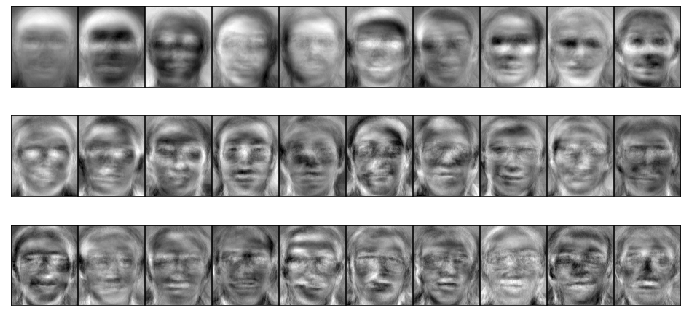

In [ ]:
from sklearn.decomposition import PCA
# n_components = 0.75 nos devolvera los autovectores que capturan el 75% de la variacion en los datos

caras_pca = PCA(n_components=.8)

caras_pca.fit(caras)

fig, axes = plt.subplots(3, 10, figsize = (12,6), 
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap="gray")

 

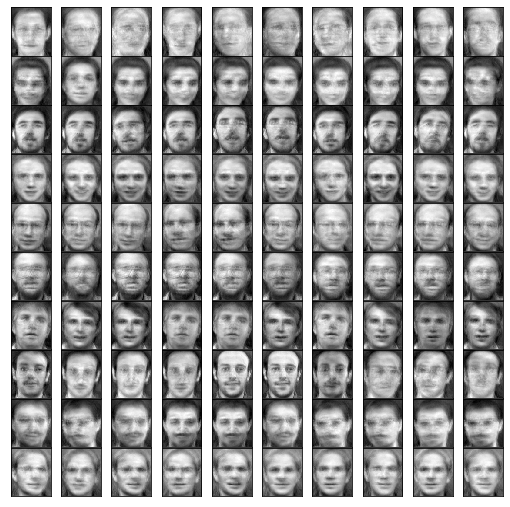

In [ ]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(10,10,figsize=(9,9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92),cmap="gray")